# Campus Recuritment Prediction

This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.

# Problem Statement
XYZ University wants to build machine learning model to know whethere student will get placed or not. So that they can provide special attention and help them to get job. Given dataset can be trated as classification or regression problem. In this project, I am going to focus on classification problem, where task is to find whethere candidate will placed or not. This is binary classification problem.

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### Load Dataset

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
df.shape

(215, 15)

- There are 215 rows and 15 columns in dataset.

In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# EDA

In [6]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df= df.fillna(0)

In [8]:
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [11]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

<AxesSubplot:xlabel='hsc_s', ylabel='count'>

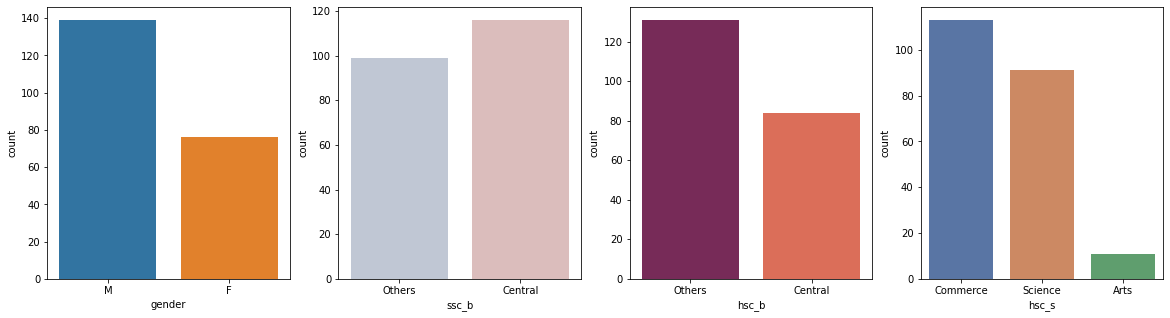

In [12]:
fig, axs = plt.subplots(ncols=4,figsize=(20,5))
sns.countplot(df['gender'], ax = axs[0])
sns.countplot(df['ssc_b'], ax = axs[1], palette="vlag")
sns.countplot(df['hsc_b'], ax = axs[2], palette="rocket")
sns.countplot(df['hsc_s'], ax = axs[3], palette="deep")

## Above charts show you the count of gender, SSC board, HSC board, HSC Stream of the candiadtes
- from above charts I see that, most of the placed candidates are male.
- candidates who placed are mostly from Commerce background.

<AxesSubplot:xlabel='status', ylabel='count'>

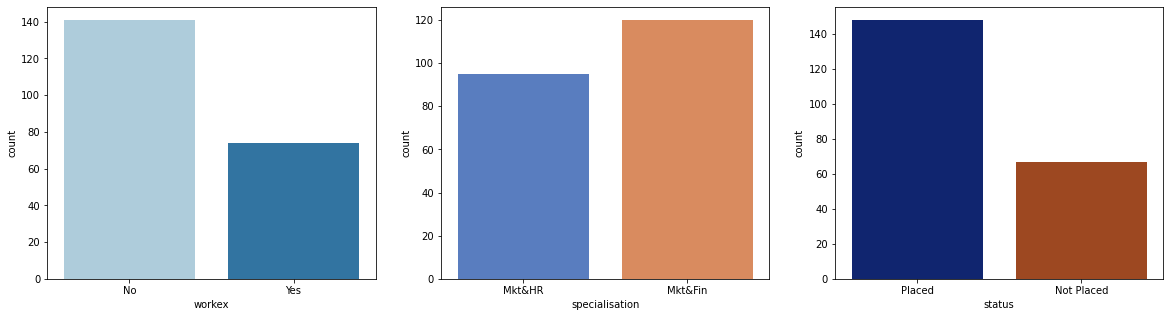

In [13]:
fig, axs = plt.subplots(ncols=3,figsize=(20,5))
sns.countplot(df['workex'], ax = axs[0], palette="Paired")
sns.countplot(df['specialisation'], ax = axs[1], palette="muted")
sns.countplot(df['status'], ax = axs[2],palette="dark")

## Above plot shows  the count of candidates having work exprience, the specialization they have chosen, & the status if placed or not placed

# Encoding

In [14]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])
df['status'] = le.fit_transform(df['status'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])

In [15]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


<AxesSubplot:xlabel='mba_p', ylabel='Density'>

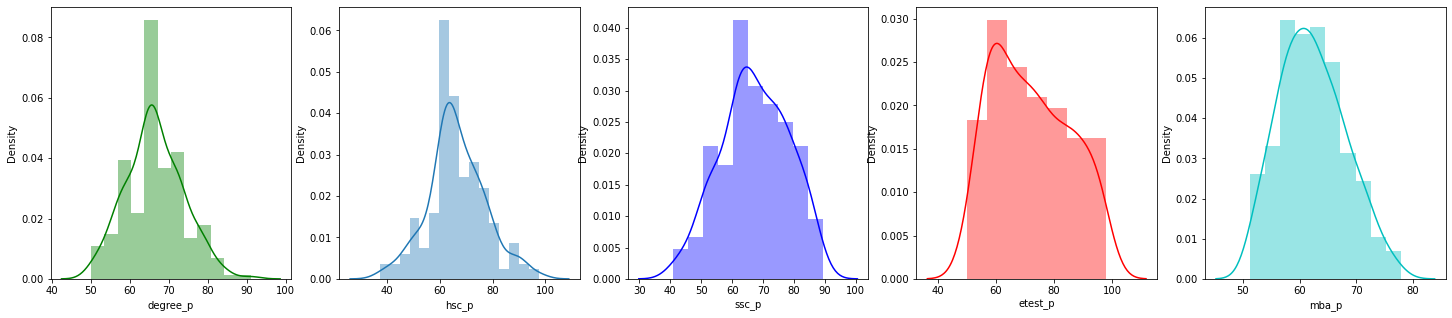

In [16]:
fig, axs = plt.subplots(ncols=5,figsize=(25,5))
sns.distplot(df['degree_p'], ax= axs[0], color = 'g')
sns.distplot(df['hsc_p'], ax= axs[1])
sns.distplot(df['ssc_p'],  ax= axs[2], color = 'b')
sns.distplot(df['etest_p'],  ax= axs[3], color = 'r')
sns.distplot(df['mba_p'],  ax= axs[4], color = 'c')

<AxesSubplot:>

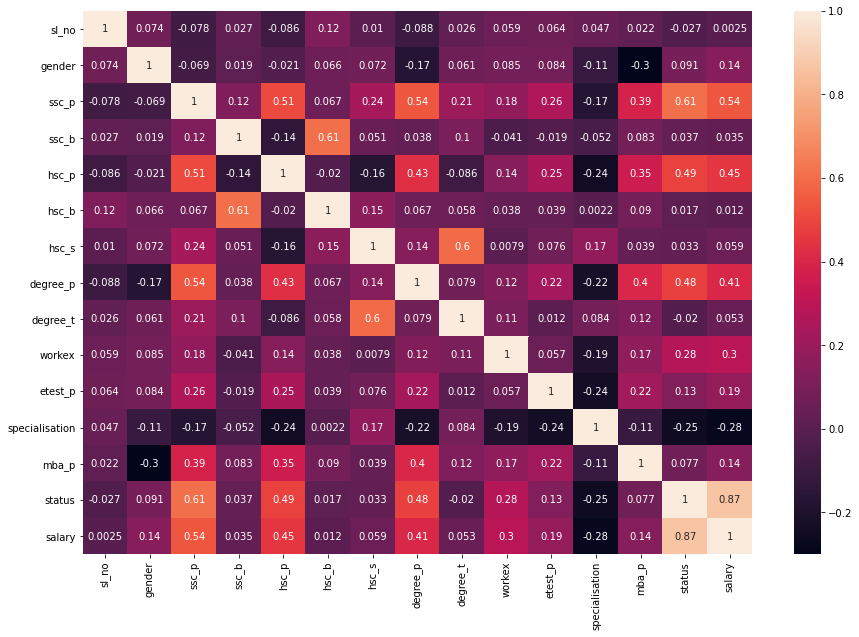

In [17]:
# Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

- ***From the above correlation matric its clear that Placement & Salary has strong relationship with three factors***
-  1) Degree% 2) HSC % 3) SSC%

# Preporcessing

In [18]:
x = df.iloc[:,1:12].values
y = df.iloc[:,-2].values

In [19]:
x

array([[ 1.  , 67.  ,  1.  , ...,  0.  , 55.  ,  1.  ],
       [ 1.  , 79.33,  0.  , ...,  1.  , 86.5 ,  0.  ],
       [ 1.  , 65.  ,  0.  , ...,  0.  , 75.  ,  0.  ],
       ...,
       [ 1.  , 67.  ,  1.  , ...,  1.  , 59.  ,  0.  ],
       [ 0.  , 74.  ,  1.  , ...,  0.  , 70.  ,  1.  ],
       [ 1.  , 62.  ,  0.  , ...,  0.  , 89.  ,  1.  ]])

In [20]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=101, stratify=y)

In [22]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()


In [23]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(f'Accuracy:- {accuracy_score(ytest, ypred)}')
    print(f'Classification_Report:- {classification_report(ytest, ypred)}')
    print(f'Confusion_matrix:-  \n {confusion_matrix(ytest, ypred)}')

In [24]:
mymodel(logreg)

Accuracy:- 0.8372093023255814
Classification_Report:-               precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43

Confusion_matrix:-  
 [[ 8  5]
 [ 2 28]]


In [25]:
mymodel(knn)

Accuracy:- 0.8372093023255814
Classification_Report:-               precision    recall  f1-score   support

           0       0.88      0.54      0.67        13
           1       0.83      0.97      0.89        30

    accuracy                           0.84        43
   macro avg       0.85      0.75      0.78        43
weighted avg       0.84      0.84      0.82        43

Confusion_matrix:-  
 [[ 7  6]
 [ 1 29]]


In [26]:
mymodel(svm)

Accuracy:- 0.8372093023255814
Classification_Report:-               precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43

Confusion_matrix:-  
 [[ 8  5]
 [ 2 28]]


In [27]:
mymodel(dt)

Accuracy:- 0.9069767441860465
Classification_Report:-               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.91      0.97      0.94        30

    accuracy                           0.91        43
   macro avg       0.91      0.87      0.88        43
weighted avg       0.91      0.91      0.90        43

Confusion_matrix:-  
 [[10  3]
 [ 1 29]]


# Hyperparameter

In [28]:
logreg = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=6)
svm = SVC(kernel='linear')

In [29]:
mymodel(knn)

Accuracy:- 0.8372093023255814
Classification_Report:-               precision    recall  f1-score   support

           0       0.80      0.62      0.70        13
           1       0.85      0.93      0.89        30

    accuracy                           0.84        43
   macro avg       0.82      0.77      0.79        43
weighted avg       0.83      0.84      0.83        43

Confusion_matrix:-  
 [[ 8  5]
 [ 2 28]]


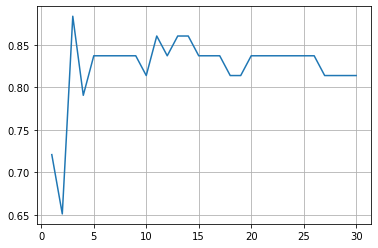

In [30]:
accuracy=[]
for i in range (1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)
    
plt.plot(range(1,31), accuracy)
plt.grid(True)

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
mymodel(knn)

Accuracy:- 0.8837209302325582
Classification_Report:-               precision    recall  f1-score   support

           0       1.00      0.62      0.76        13
           1       0.86      1.00      0.92        30

    accuracy                           0.88        43
   macro avg       0.93      0.81      0.84        43
weighted avg       0.90      0.88      0.87        43

Confusion_matrix:-  
 [[ 8  5]
 [ 0 30]]


In [32]:
# Decision Tree

In [33]:
for i in range(1,51):
    dt1 = DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain, ytrain)
    ypred= dt1 = dt1.predict(xtest)
    print(f'{i}:- {accuracy_score(ytest,ypred)}')

1:- 0.7906976744186046
2:- 0.7906976744186046
3:- 0.813953488372093
4:- 0.813953488372093
5:- 0.8837209302325582
6:- 0.8837209302325582
7:- 0.8604651162790697
8:- 0.8837209302325582
9:- 0.9069767441860465
10:- 0.8837209302325582
11:- 0.8837209302325582
12:- 0.8837209302325582
13:- 0.9069767441860465
14:- 0.8837209302325582
15:- 0.9069767441860465
16:- 0.8837209302325582
17:- 0.9069767441860465
18:- 0.9069767441860465
19:- 0.8837209302325582
20:- 0.9069767441860465
21:- 0.8837209302325582
22:- 0.8837209302325582
23:- 0.8837209302325582
24:- 0.8837209302325582
25:- 0.9069767441860465
26:- 0.8837209302325582
27:- 0.8837209302325582
28:- 0.9069767441860465
29:- 0.9069767441860465
30:- 0.9069767441860465
31:- 0.8837209302325582
32:- 0.9069767441860465
33:- 0.8837209302325582
34:- 0.8837209302325582
35:- 0.8837209302325582
36:- 0.8837209302325582
37:- 0.8837209302325582
38:- 0.8837209302325582
39:- 0.8837209302325582
40:- 0.9069767441860465
41:- 0.8837209302325582
42:- 0.8837209302325582
43:

In [39]:
dt2 = DecisionTreeClassifier(max_depth=20)
mymodel(dt2)

Accuracy:- 0.8837209302325582
Classification_Report:-               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43

Confusion_matrix:-  
 [[10  3]
 [ 2 28]]


In [40]:
dt3 = DecisionTreeClassifier(max_depth=40, criterion='gini')
mymodel(dt3)

Accuracy:- 0.9069767441860465
Classification_Report:-               precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.91      0.97      0.94        30

    accuracy                           0.91        43
   macro avg       0.91      0.87      0.88        43
weighted avg       0.91      0.91      0.90        43

Confusion_matrix:-  
 [[10  3]
 [ 1 29]]


In [41]:
for i in range(1,1000,50):
    dt3 = DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(xtrain, ytrain)
    ypred = dt3.predict(xtest)
    print(f'{i}:- {accuracy_score(ytest,ypred)}')

1:- 0.9069767441860465
51:- 0.7441860465116279
101:- 0.6976744186046512
151:- 0.6976744186046512
201:- 0.6976744186046512
251:- 0.6976744186046512
301:- 0.6976744186046512
351:- 0.6976744186046512
401:- 0.6976744186046512
451:- 0.6976744186046512
501:- 0.6976744186046512
551:- 0.6976744186046512
601:- 0.6976744186046512
651:- 0.6976744186046512
701:- 0.6976744186046512
751:- 0.6976744186046512
801:- 0.6976744186046512
851:- 0.6976744186046512
901:- 0.6976744186046512
951:- 0.6976744186046512


In [42]:
dt4 = DecisionTreeClassifier(min_samples_leaf=1)
mymodel(dt4)

Accuracy:- 0.8837209302325582
Classification_Report:-               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43

Confusion_matrix:-  
 [[10  3]
 [ 2 28]]


In [43]:
dt5 = DecisionTreeClassifier(min_samples_leaf=1, criterion='gini')
mymodel(dt5)

Accuracy:- 0.8837209302325582
Classification_Report:-               precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.90      0.93      0.92        30

    accuracy                           0.88        43
   macro avg       0.87      0.85      0.86        43
weighted avg       0.88      0.88      0.88        43

Confusion_matrix:-  
 [[10  3]
 [ 2 28]]
